In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
#import dataset
dataset = pd.read_csv("coin_bitcoin.csv")

In [3]:
dataset.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [5]:
dataset

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [6]:
print(dataset.isnull().values.any())

False


In [14]:
# Delete rows where volume was equal to 0.
dataset = dataset[dataset['Volume'] != 0]
dataset.head()

,Date,High,Low,Open,Close,Volume,Marketcap,Avg_Close_7days,Amount Bitcoins,Intra-Day Volitality,Percent Intra-Day Volatility,Inter-Day Volatility,Percent Inter-Day Volatility
242,2013-12-27,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395e+09,767.932861,1.173278e+07,63.910034,8.219834,7.239990,0.931176
243,2013-12-28,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919e+09,786.744289,1.201919e+07,41.710022,5.583223,17.219971,2.305032
244,2013-12-29,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104e+09,813.670009,1.247456e+07,34.169983,4.564457,11.080017,1.480079
245,2013-12-30,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168e+09,841.835720,1.243295e+07,26.359985,3.438558,2.119995,0.276545
246,2013-12-31,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325e+09,848.691432,1.208876e+07,22.410034,2.946440,17.390015,2.286415


In [12]:
# Remove not needed columns
del dataset['SNo']
del dataset['Name']
del dataset['Symbol']
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date

dataset

,Date,High,Low,Open,Close,Volume,Marketcap,Avg_Close_7days,Amount Bitcoins,Intra-Day Volitality,Percent Intra-Day Volatility,Inter-Day Volatility,Percent Inter-Day Volatility
0,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,114.237143,1.192890e+07,13.488007,9.145155,5.539993,3.756233
1,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,110.308572,1.071398e+07,12.879990,8.766072,22.010002,14.979925
2,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,109.819430,9.344997e+06,32.169998,22.996639,11.779999,8.420901
3,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,110.885144,1.004054e+07,33.318100,26.527150,7.459999,5.939490
4,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,113.663715,1.022113e+07,29.028000,26.845961,14.750000,13.641240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,NaN,1.894064e+07,1168.907919,3.444084,771.499812,2.273156
2987,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,NaN,1.919807e+07,1506.563363,4.315655,619.231364,1.773831
2988,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,NaN,1.908450e+07,1541.089690,4.288242,1541.777310,4.290155
2989,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,NaN,1.793136e+07,2070.683396,5.868561,489.190995,1.386425


In [7]:
# Add a new column 'Avg_Close_7days' with NaN values
dataset['Avg_Close_7days'] = pd.Series(dtype=float)

# Calculate the average close for the next 7 days
for i in range(len(dataset) - 7):
    avg_close = dataset['Close'].iloc[i+1:i+8].mean()
    dataset.at[i, 'Avg_Close_7days'] = avg_close

In [8]:
# Show how many Bitcoins did exist during this period of time.
amount_of_bitcoins = dataset.loc[:, "Marketcap"] / dataset.loc[:, "Open"]
round(amount_of_bitcoins)
# Add column 'Amount Bitcoins'.
dataset.loc[:, 'Amount Bitcoins'] = amount_of_bitcoins
dataset

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Avg_Close_7days,Amount Bitcoins
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,114.237143,1.192890e+07
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,110.308572,1.071398e+07
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,109.819430,9.344997e+06
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,110.885144,1.004054e+07
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,113.663715,1.022113e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,NaN,1.894064e+07
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,NaN,1.919807e+07
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,NaN,1.908450e+07
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,NaN,1.793136e+07


In [9]:
# Add column "Intra-Day Volitality"
dataset.loc[:, 'Intra-Day Volitality'] = dataset.loc[:, 'High'] - dataset.loc[:, 'Low']
dataset

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Avg_Close_7days,Amount Bitcoins,Intra-Day Volitality
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,114.237143,1.192890e+07,13.488007
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,110.308572,1.071398e+07,12.879990
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,109.819430,9.344997e+06,32.169998
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,110.885144,1.004054e+07,33.318100
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,113.663715,1.022113e+07,29.028000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,NaN,1.894064e+07,1168.907919
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,NaN,1.919807e+07,1506.563363
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,NaN,1.908450e+07,1541.089690
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,NaN,1.793136e+07,2070.683396


In [10]:
# Add column 'Percent Intra-Day Volatility'
dataset.loc[:, 'Percent Intra-Day Volatility'] = dataset.loc[:, 'Intra-Day Volitality'] / dataset.loc[:, 'High'] * 100
dataset

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Avg_Close_7days,Amount Bitcoins,Intra-Day Volitality,Percent Intra-Day Volatility
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,114.237143,1.192890e+07,13.488007,9.145155
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,110.308572,1.071398e+07,12.879990,8.766072
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,109.819430,9.344997e+06,32.169998,22.996639
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,110.885144,1.004054e+07,33.318100,26.527150
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,113.663715,1.022113e+07,29.028000,26.845961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,NaN,1.894064e+07,1168.907919,3.444084
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,NaN,1.919807e+07,1506.563363,4.315655
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,NaN,1.908450e+07,1541.089690,4.288242
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,NaN,1.793136e+07,2070.683396,5.868561


In [11]:
# Calculate the day-to-day price change by shifting the 'Close' values one day forward.
price_change = dataset.loc[:, 'Close'].shift(-1)
# Calculate the inter-day volatility by subtracting the price change from the 'Close' column
inter_day_volatility = price_change - dataset.loc[:, 'Close']
# Calculate the absolute values of inter-day volatility
inter_day_volatility = abs(inter_day_volatility)
# Calculate Inter-day-volatility to our DataSet
dataset.loc[:, 'Inter-Day Volatility'] = inter_day_volatility
# Calculate the percent inter-day volatility by dividing the 'Inter-Day Volatility' by the 'High' and multiplying by 100
dataset.loc[:, 'Percent Inter-Day Volatility'] = (dataset.loc[:, 'Inter-Day Volatility'] / dataset.loc[:, 'High']) * 100

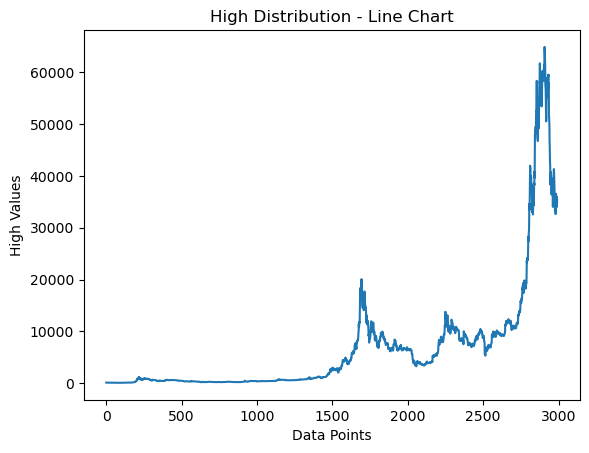

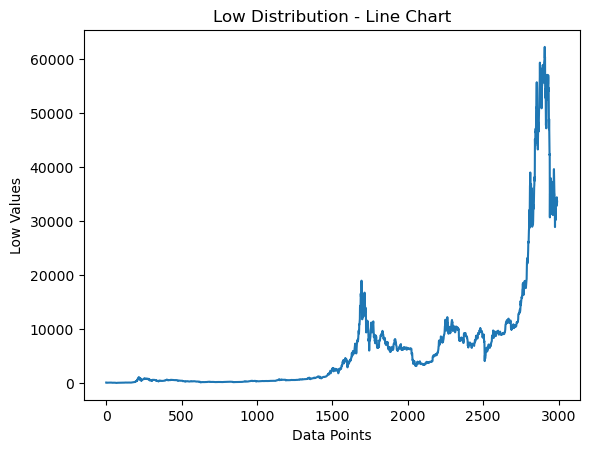

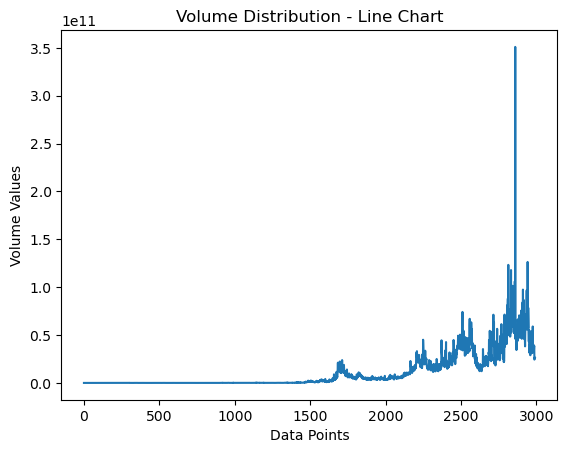

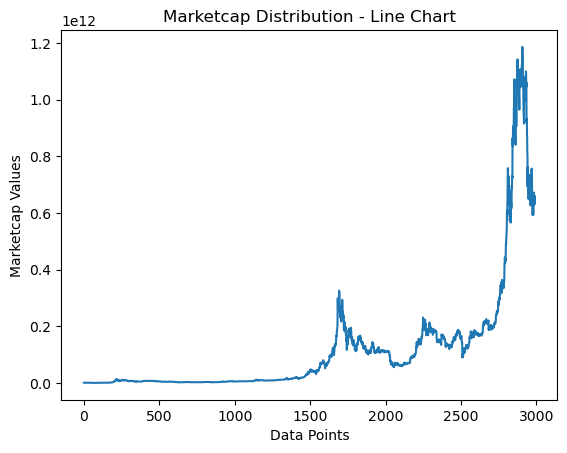

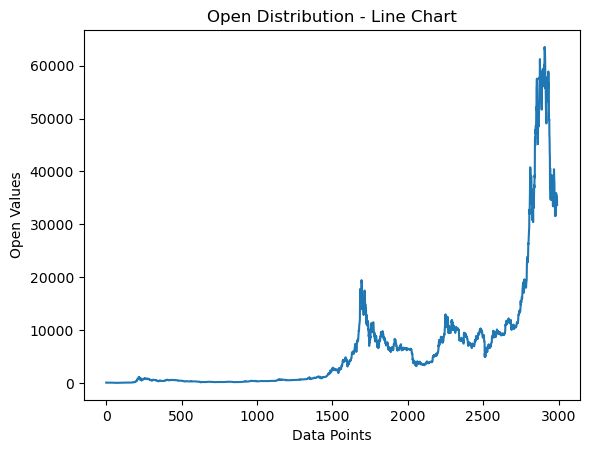

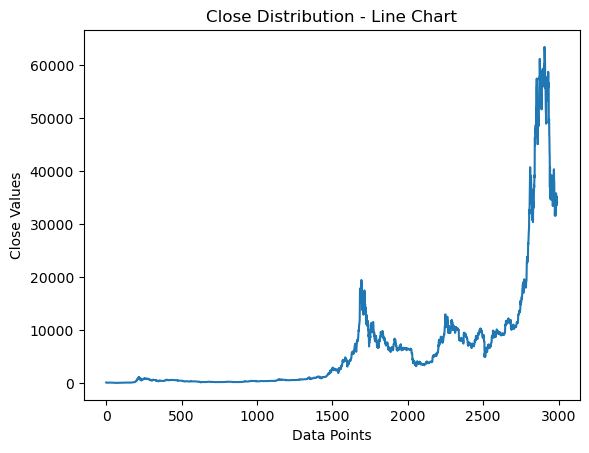

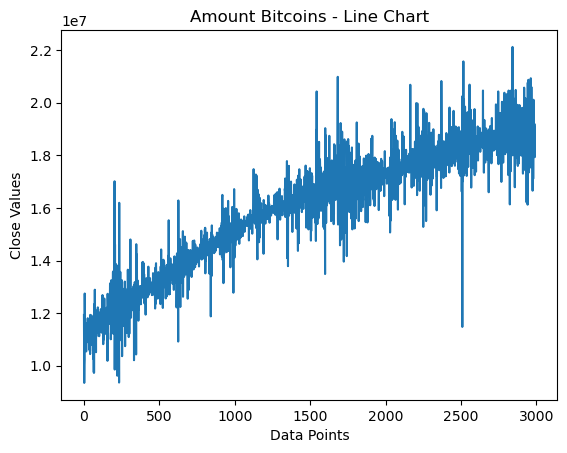

In [13]:
# High
plt.plot(dataset['High'])
plt.title('High Distribution - Line Chart')
plt.xlabel('Data Points')
plt.ylabel('High Values')
plt.show()

# Low
plt.plot(dataset['Low'])
plt.title('Low Distribution - Line Chart')
plt.xlabel('Data Points')
plt.ylabel('Low Values')
plt.show()

# Volume
plt.plot(dataset['Volume'])
plt.title('Volume Distribution - Line Chart')
plt.xlabel('Data Points')
plt.ylabel('Volume Values')
plt.show()

# Marketcap
plt.plot(dataset['Marketcap'])
plt.title('Marketcap Distribution - Line Chart')
plt.xlabel('Data Points')
plt.ylabel('Marketcap Values')
plt.show()

# Open
plt.plot(dataset['Open'])
plt.title('Open Distribution - Line Chart')
plt.xlabel('Data Points')
plt.ylabel('Open Values')
plt.show()

# Close
plt.plot(dataset['Close'])
plt.title('Close Distribution - Line Chart')
plt.xlabel('Data Points')
plt.ylabel('Close Values')
plt.show()

# Amount Bitcoins
plt.plot(dataset['Amount Bitcoins'])
plt.title('Amount Bitcoins - Line Chart')
plt.xlabel('Data Points')
plt.ylabel('Close Values')
plt.show()

In [15]:
#scale values to range 0-1
trainset = dataset.iloc[:, 3:4].values
scaler = MinMaxScaler(feature_range = (0,1))
data_scaled = scaler.fit_transform(trainset)
data_scaled

array([[0.0092567 ],
       [0.00885731],
       [0.00870056],
       ...,
       [0.54444165],
       [0.55420977],
       [0.52957027]])

In [16]:
#split dataset to train and test sets
x_train = []
y_train = []
window = 30

for i in range(window, 2200):
    x_train.append(data_scaled[i-window:i, 0])
    y_train.append(data_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_test = []
y_test = []
for i in range(2201, 2700):
    x_test.append(data_scaled[i-window:i, 0])
    y_test.append(data_scaled[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [18]:
#build LSTM neural network model
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [19]:
#train model
regressor.fit(x_train, y_train,epochs = 10, batch_size = 32)

Epoch 1/10

68/68 [==============================] - 8s 26ms/step - loss: 7.3685e-04
Epoch 2/10
68/68 [==============================] - 2s 25ms/step - loss: 2.9283e-04
Epoch 3/10
68/68 [==============================] - 2s 25ms/step - loss: 2.6857e-04
Epoch 4/10
68/68 [==============================] - 2s 25ms/step - loss: 2.2244e-04
Epoch 5/10
68/68 [==============================] - 2s 24ms/step - loss: 1.9770e-04
Epoch 6/10
68/68 [==============================] - 2s 24ms/step - loss: 2.4539e-04
Epoch 7/10
68/68 [==============================] - 2s 24ms/step - loss: 1.8545e-04
Epoch 8/10
68/68 [==============================] - 2s 25ms/step - loss: 1.8803e-04
Epoch 9/10
68/68 [==============================] - 2s 25ms/step - loss: 1.5425e-04
Epoch 10/10
68/68 [==============================] - 2s 25ms/step - loss: 1.4712e-04


In [20]:
#generate prices for test data
predicted_price = regressor.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price

16/16 [==============================] - 2s 10ms/step


array([[ 7352.5327],
       [ 7334.959 ],
       [ 7334.281 ],
       [ 7363.5894],
       [ 7428.3916],
       [ 7520.9556],
       [ 7633.0166],
       [ 7752.516 ],
       [ 7870.459 ],
       [ 7979.365 ],
       [ 8084.342 ],
       [ 8192.667 ],
       [ 8304.855 ],
       [ 8416.875 ],
       [ 8529.374 ],
       [ 8633.109 ],
       [ 8718.474 ],
       [ 8778.959 ],
       [ 8814.538 ],
       [ 8820.938 ],
       [ 8798.622 ],
       [ 8750.759 ],
       [ 8687.492 ],
       [ 8626.299 ],
       [ 8589.321 ],
       [ 8591.511 ],
       [ 8639.138 ],
       [ 8725.636 ],
       [ 8839.521 ],
       [ 8962.81  ],
       [ 9081.387 ],
       [ 9181.511 ],
       [ 9260.644 ],
       [ 9324.314 ],
       [ 9381.474 ],
       [ 9438.257 ],
       [ 9499.583 ],
       [ 9565.769 ],
       [ 9636.585 ],
       [ 9714.5205],
       [ 9793.722 ],
       [ 9873.928 ],
       [ 9943.603 ],
       [ 9991.865 ],
       [10010.418 ],
       [10004.949 ],
       [ 9975.013 ],
       [ 9921

In [21]:
#get real price for comparison
real_price =  scaler.inverse_transform(y_test.reshape(-1, 1))
real_price

array([[ 7410.45216807],
       [ 7768.68189098],
       [ 8161.93547734],
       [ 8082.29607413],
       [ 7878.30753815],
       [ 8162.1911379 ],
       [ 8033.26184596],
       [ 8189.77206362],
       [ 8140.93309605],
       [ 8825.34368451],
       [ 8812.48149122],
       [ 8725.20996387],
       [ 8927.21225983],
       [ 8941.44574506],
       [ 8704.63181434],
       [ 8658.99118302],
       [ 8744.21075075],
       [ 8680.65055954],
       [ 8405.56773288],
       [ 8440.11958702],
       [ 8364.41006958],
       [ 8597.30877926],
       [ 8912.52433979],
       [ 9357.47037892],
       [ 9316.01697842],
       [ 9508.31314184],
       [ 9346.35762761],
       [ 9389.82059095],
       [ 9344.68367852],
       [ 9292.84190002],
       [ 9183.41577743],
       [ 9617.8210448 ],
       [ 9726.00315742],
       [ 9793.07042002],
       [ 9863.89488145],
       [10115.559686  ],
       [ 9855.89170857],
       [10202.3876541 ],
       [10323.9604932 ],
       [10211.5503892 ],


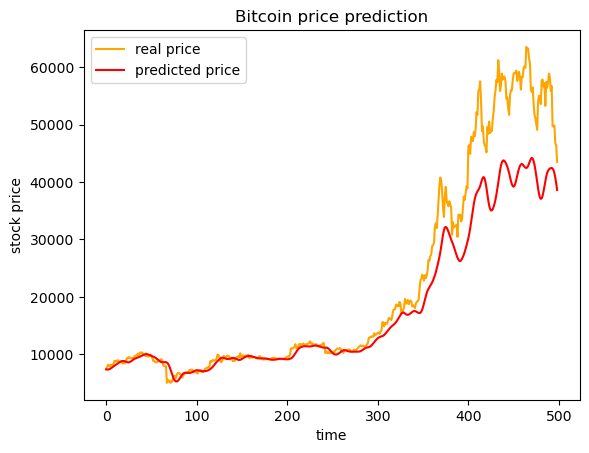

In [22]:
#plot predicted and real price
plt.plot(real_price, color = 'orange', label = 'real price')
plt.plot(predicted_price, color = 'red', label = 'predicted price')
plt.title('Bitcoin price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [23]:
#metrics
print(f'RMSE {metrics.mean_squared_error(predicted_price, real_price, squared=False)}')
print(f'MAE {metrics.mean_absolute_error(predicted_price, real_price)}')

RMSE 7028.541784655793
MAE 3976.5858558282257
